## Systems identification 

Once you describe your system using differential equations, the next stage is to figure out the model parameters. Assume for example that you have a spring-damper-mass system (a physical system) whose behaviour can be described by


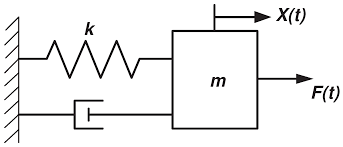

$$
m\ddot{x} + b\dot{x} + kx =  F(t),
$$
where $F(t)$ is the force applied to the mass.

Demonstrate that the state equation for this system is 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
-\frac{k}{m} & -\frac{b}{m}
\end{array}\right]S(t) + \left[\begin{array}{cc}
0  \\
\frac{1}{m}
\end{array}\right]F(t).
$$
and 
$$
S(t) = \left[\begin{array}{c}
x(t) \\
\dot{x}(t)
\end{array}\right].
$$


To study this system, you should find a way to measure $m$, $b$ and $k$. 

This can be done in multiple ways:

- Disassemble the system and mesure each component separately :(

- Use systems identification (SysID) to estimate the models parameters from data :)


How to use SysID :

1) Organize your system's equations to fit the format requiered by leas squares

2) Perform one experiment and record the requiered data

3) Use numerical methods to compute the requiered derivatives 

4) Use least squares to determine the model parameters


### Example


For the mass-spring-damper system, we can re-write the equation as
$$
x(t) = -\frac{b}{k}\dot{x}(t) - \frac{m}{k}\ddot{x}(t) +  \frac{1}{k}F(t),
$$

we can write this equation as
$$
\left[\begin{array}{c}
x(0) \\
x(1) \\
\vdots \\
x(N)
\end{array}\right] = \left[\begin{array}{ccc}
\dot{x}(0) & \ddot{x}(0) & F(0) \\
\dot{x}(1) & \ddot{x}(1) & F(1) \\
\vdots & \vdots & \vdots \\
\dot{x}(N) & \ddot{x}(N) & F(N) \\
\end{array}\right] \left[\begin{array}{cc}
-b/k \\
-m/k \\
1/k
\end{array}\right]
$$

This equation can be solved for $b/m$, $k/m$, and $k$ using least squares if we know $x(t)$, $\dot{x}(t)$, $ddot{x}(t)$, and $F(t)$.  

Assume that you have the system (with unknown $m$, $b$, and $k$) and perform one experiment. Assume for simplicity that $F(t)=0$. 

You recorded the mass position $x(t)$ with a sampling interval of $h=0.01$s. Now, what to use that information to figure out the model parameters.  

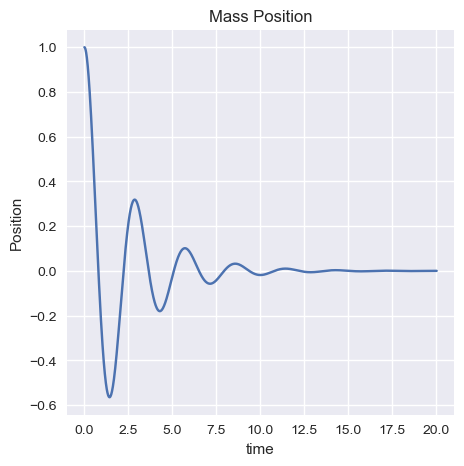

In [31]:
#load the data
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x = np.loadtxt('msd.txt')
h=0.01
fig, ax= plt.subplots(1,1,figsize = (5, 5), sharex=True)
ax.plot(np.arange(0,len(x))*h, x)
ax.set_xlabel('time')
ax.set_ylabel('Position')
ax.set_title('Mass Position')
plt.show()

In [28]:
#compure derivatives using numerical methods



dx = np.gradient(x, h)
ddx = np.gradient(dx, h)



array([-0.1601795 , -0.20136337])

In [38]:
#solve the least squares problem 
from scipy.linalg import lstsq
M= np.column_stack((dx,ddx))
p, res, rnk, s = lstsq(M,x)
print(f'The resulting coeficients are \n -b/k = {p[0]} \n -m/k = {p[1]}')

The resulting coeficients are 
 -b/k = -0.16017949545102858 
 -m/k = -0.2013633734438929


The model that produced the recorded data had parameters
- m = 1
- b = 0.8
- k = 5

so that 

- -b/k = -0.16
- -m/k = 0.2

Compare these values with the result of the least squares procedure